In [2]:
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Employee%20Attrition/MFG10YearTerminationData.csv")
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [4]:
data.shape

(49653, 18)

In [5]:
data.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [7]:
data.drop_duplicates(inplace=True)
data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [8]:
data.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)
data.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [9]:
data.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [10]:
data.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [11]:
data.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [12]:
data.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [13]:
data.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [14]:
board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

data['job_title'] = data['job_title'].map(job_title)

In [15]:
data.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

In [16]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

data['city_name'] = data['city_name'].map(city_population)

In [17]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

data['city_name'] = data.city_name.map(change_city)

In [18]:
data["city_name"].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [19]:
data.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [20]:
data.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

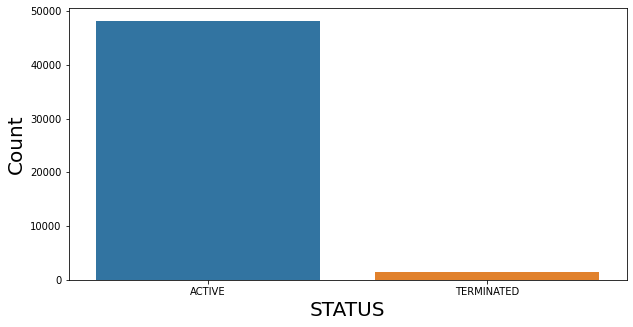

In [21]:
status_label = data.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [22]:
from sklearn.utils import resample

df_1 = data[data.STATUS=="ACTIVE"]
df_2 = data[data.STATUS=="TERMINATED"]
 
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=48168,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_1, df_2_upsampled])
 
df_upsampled.STATUS.value_counts()

ACTIVE        48168
TERMINATED    48168
Name: STATUS, dtype: int64

In [23]:
df_upsampled

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48938,8/8/1998,1/31/2007,60,8,town,Produce,employee,18,M,Retirement,Voluntary,2007,TERMINATED,STORES
48796,6/1/1997,11/24/2010,65,13,town,Meats,employee,28,F,Retirement,Voluntary,2010,TERMINATED,STORES
49456,5/19/2009,11/12/2012,26,3,town,Processed Foods,employee,21,F,Resignaton,Voluntary,2012,TERMINATED,STORES
49046,6/23/1999,12/16/2007,60,8,mega,Meats,employee,35,M,Retirement,Voluntary,2007,TERMINATED,STORES


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

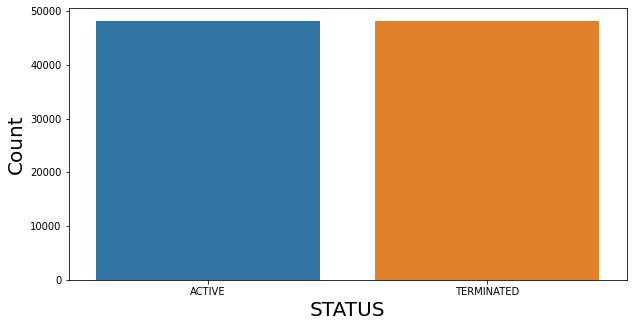

In [24]:
status_label = df_upsampled.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

<AxesSubplot:xlabel='city_name', ylabel='count'>

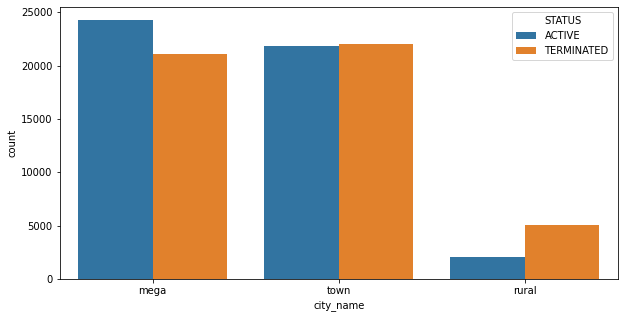

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x="city_name", hue="STATUS", data=df_upsampled)

<AxesSubplot:xlabel='BUSINESS_UNIT', ylabel='count'>

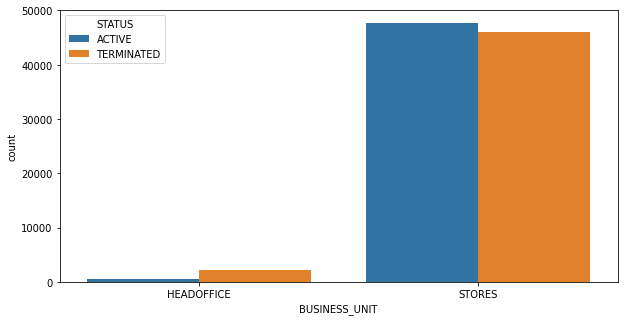

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df_upsampled)

<AxesSubplot:xlabel='job_title', ylabel='count'>

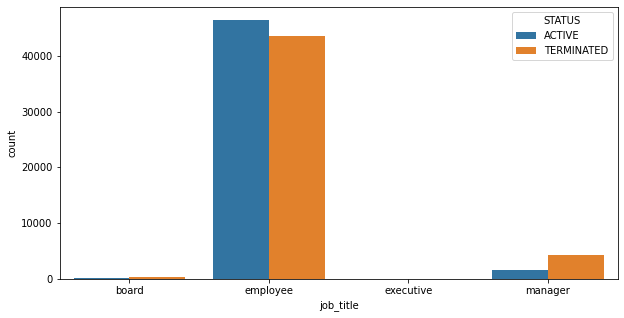

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x="job_title", hue="STATUS", data=df_upsampled)

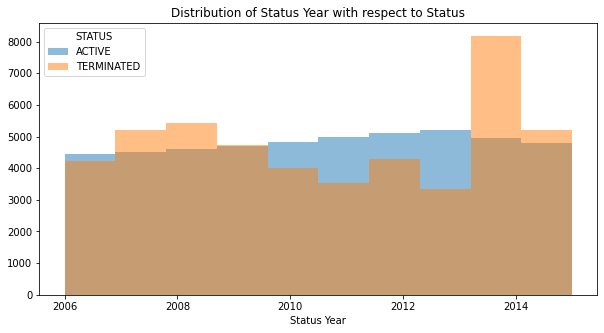

In [28]:
plt.figure(figsize=(10, 5))
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Status Year with respect to Status")
plt.xlabel("Status Year")
plt.legend(title = "STATUS")
plt.show()

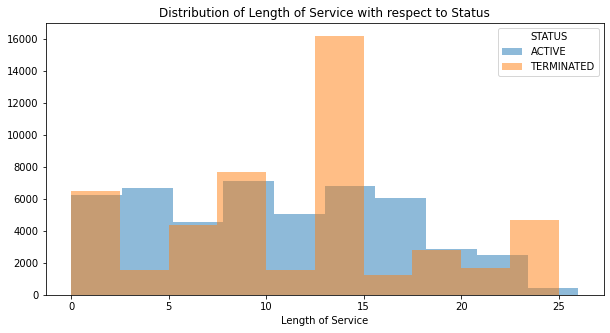

In [29]:
plt.figure(figsize=(10, 5))
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Length of Service with respect to Status")
plt.xlabel("Length of Service")
plt.legend(title = "STATUS")
plt.show()

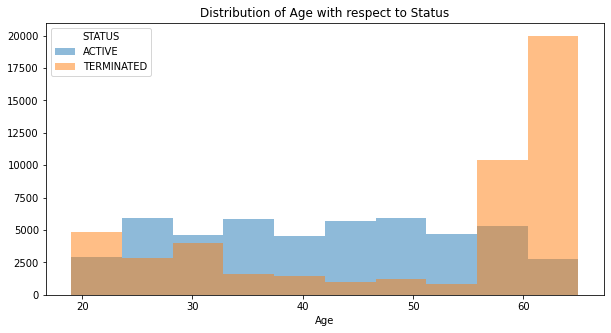

In [30]:
plt.figure(figsize=(10, 5))
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Age with respect to Status")
plt.xlabel("Age")
plt.legend(title = "STATUS")
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

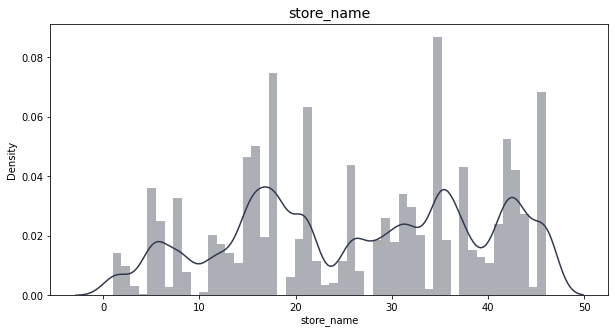

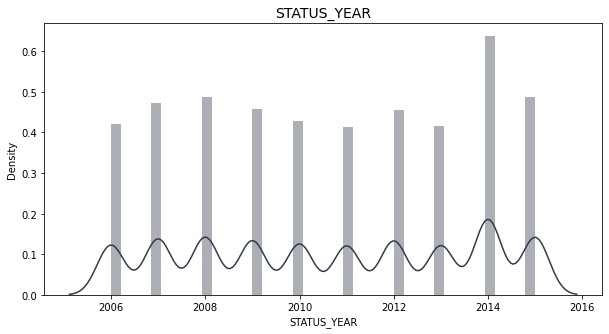

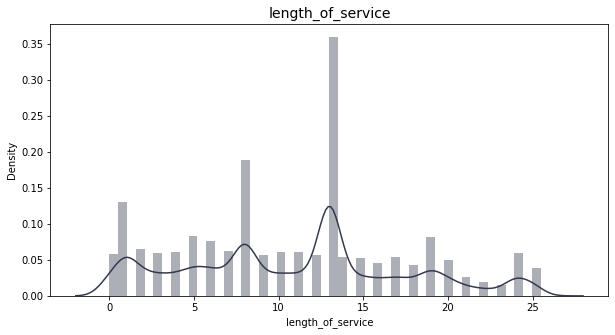

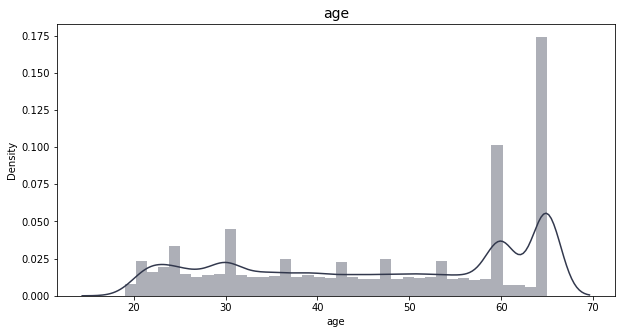

In [31]:
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.distplot(df_upsampled[column], color = '#32384D', label = 'terminated',  kde = True)
    plt.title(column, size = 14)

In [32]:
df_upsampled.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [33]:
city_name_label = {value: key for key, value in enumerate(df_upsampled['city_name'].unique())}
df_upsampled['city_name'] = df_upsampled['city_name'].map(city_name_label)

In [34]:
department_name_label = {value: key for key, value in enumerate(df_upsampled['department_name'].unique())}
df_upsampled['department_name'] = df_upsampled['department_name'].map(department_name_label)

In [35]:
job_title_label = {value: key for key, value in enumerate(df_upsampled['job_title'].unique())}
df_upsampled['job_title'] = df_upsampled['job_title'].map(job_title_label)

In [36]:
gender_short_label = {value: key for key, value in enumerate(df_upsampled['gender_short'].unique())}
df_upsampled['gender_short'] = df_upsampled['gender_short'].map(gender_short_label)

In [37]:
term_desc_label = {value: key for key, value in enumerate(df_upsampled['termreason_desc'].unique())}
df_upsampled['termreason_desc'] = df_upsampled['termreason_desc'].map(term_desc_label)

termtype_desc_label = {value: key for key, value in enumerate(df_upsampled['termtype_desc'].unique())}
df_upsampled['termtype_desc'] = df_upsampled['termtype_desc'].map(termtype_desc_label)


status_label = {value: key for key, value in enumerate(df_upsampled['STATUS'].unique())}
df_upsampled['STATUS'] = df_upsampled['STATUS'].map(status_label)

business_label = {value: key for key, value in enumerate(df_upsampled['BUSINESS_UNIT'].unique())}
df_upsampled['BUSINESS_UNIT'] = df_upsampled['BUSINESS_UNIT'].map(business_label)

In [38]:
df_upsampled.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,0,0,0,35,0,0,0,2006,0,0
1,8/28/1989,1/1/1900,53,18,0,0,0,35,0,0,0,2007,0,0
2,8/28/1989,1/1/1900,54,19,0,0,0,35,0,0,0,2008,0,0
3,8/28/1989,1/1/1900,55,20,0,0,0,35,0,0,0,2009,0,0
4,8/28/1989,1/1/1900,56,21,0,0,0,35,0,0,0,2010,0,0


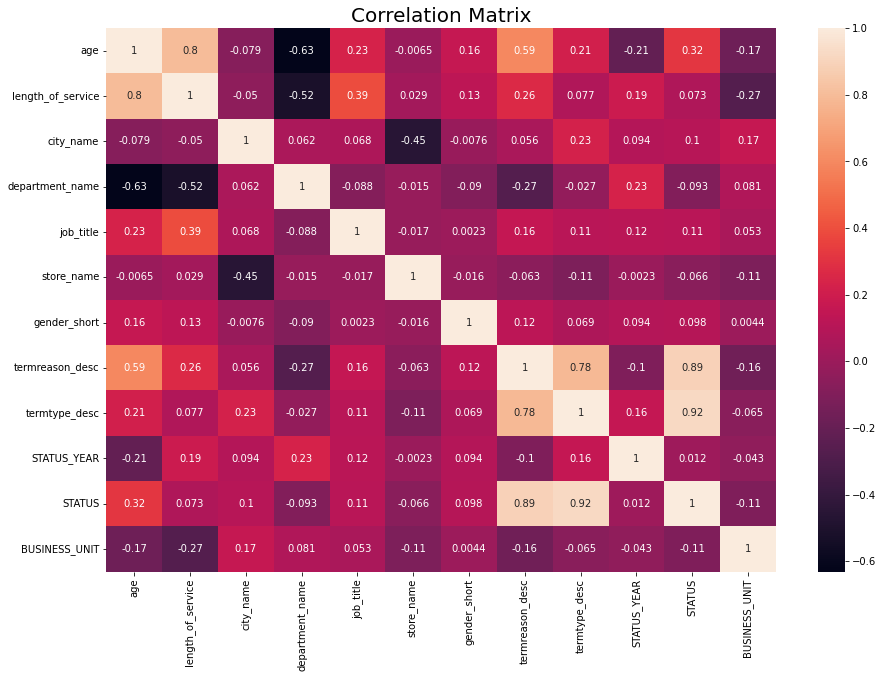

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [40]:
df_upsampled.corr()['STATUS'].sort_values(ascending=False)[1:]

termtype_desc        0.917547
termreason_desc      0.886604
age                  0.315872
job_title            0.109929
city_name            0.102445
gender_short         0.098114
length_of_service    0.072507
STATUS_YEAR          0.012100
store_name          -0.066467
department_name     -0.093282
BUSINESS_UNIT       -0.105738
Name: STATUS, dtype: float64

In [41]:
df_upsampled.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)
df_upsampled.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,0,0,0,35,0,2006,0,0
1,53,18,0,0,0,35,0,2007,0,0
2,54,19,0,0,0,35,0,2008,0,0
3,55,20,0,0,0,35,0,2009,0,0
4,56,21,0,0,0,35,0,2010,0,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
accuracy_list = []
f1_list = []
roc_auc_list = []

In [43]:
def result(X, y, ts, rs, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [44]:
x = df_upsampled[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = df_upsampled[['STATUS']]

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81     12067
           1       0.85      0.73      0.78     12017

    accuracy                           0.80     24084
   macro avg       0.80      0.80      0.80     24084
weighted avg       0.80      0.80      0.80     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.798538448762664
----------------------------------------------------------------------------------------------------

F1 Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------



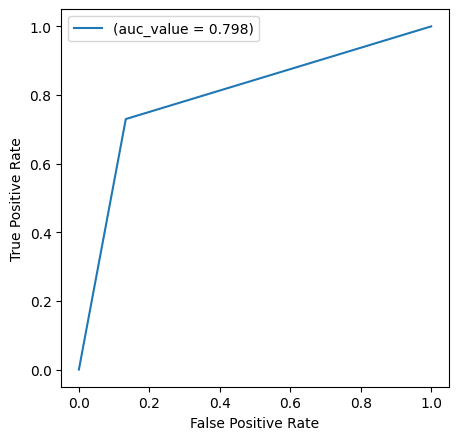


Confusion Matrix: 


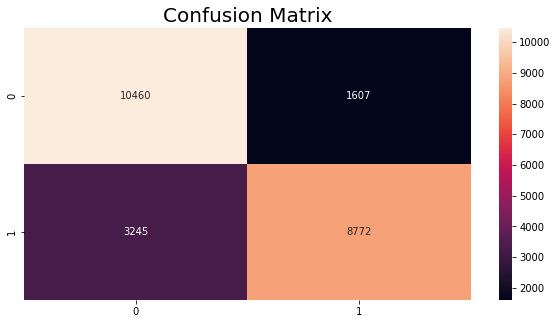

In [45]:
model = LogisticRegression()
result(x, y, 0.25, 42, model)

<ipython-input-43-202573170eec>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12067
           1       0.98      1.00      0.99     12017

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9907407407407407
----------------------------------------------------------------------------------------------------

F1 Score:  0.9908067774250732
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9908067774250732
----------------------------------------------------------------------------------------------------



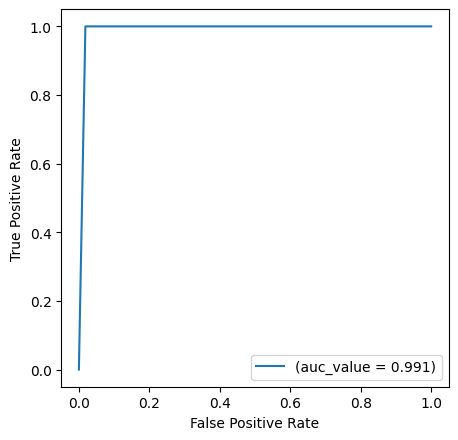


Confusion Matrix: 


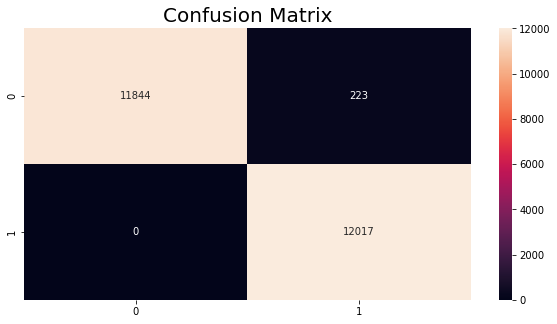

In [46]:
rf = RandomForestClassifier()
result(x, y, 0.25, 42, rf)

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     12067
           1       0.95      1.00      0.97     12017

    accuracy                           0.97     24084
   macro avg       0.97      0.97      0.97     24084
weighted avg       0.97      0.97      0.97     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.973177213087527
----------------------------------------------------------------------------------------------------

F1 Score:  0.9737312947299935
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9737312947299935
----------------------------------------------------------------------------------------------------



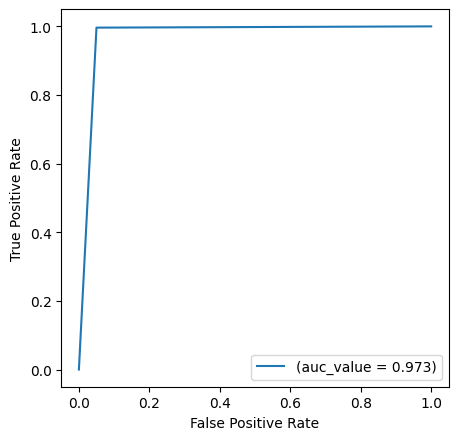


Confusion Matrix: 


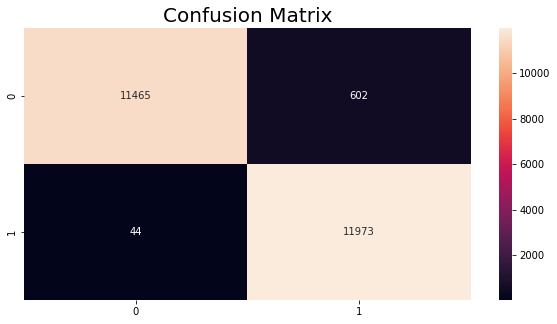

In [47]:
knn = KNeighborsClassifier()
result(x, y, 0.25, 42, knn)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     12067
           1       0.96      0.87      0.91     12017

    accuracy                           0.91     24084
   macro avg       0.92      0.91      0.91     24084
weighted avg       0.92      0.91      0.91     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9134695233349942
----------------------------------------------------------------------------------------------------

F1 Score:  0.9089956331877729
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9089956331877729
----------------------------------------------------------------------------------------------------



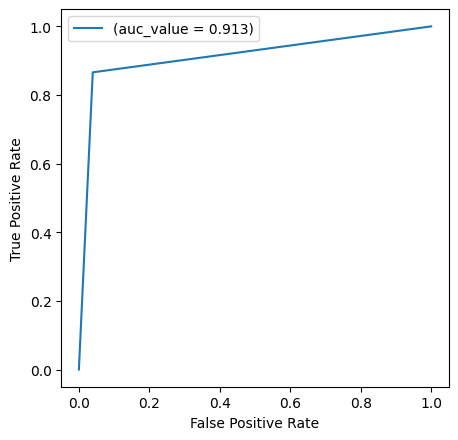


Confusion Matrix: 


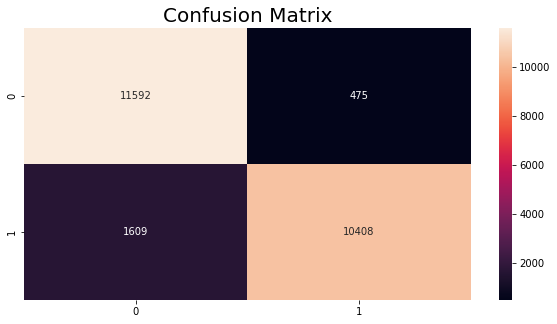

In [48]:
gb = GradientBoostingClassifier()
result(x, y, 0.25, 42, gb)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12067
           1       0.98      0.98      0.98     12017

    accuracy                           0.98     24084
   macro avg       0.98      0.98      0.98     24084
weighted avg       0.98      0.98      0.98     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9792808503570836
----------------------------------------------------------------------------------------------------

F1 Score:  0.9793177767646204
----------------------------------------------------------------------------------------------

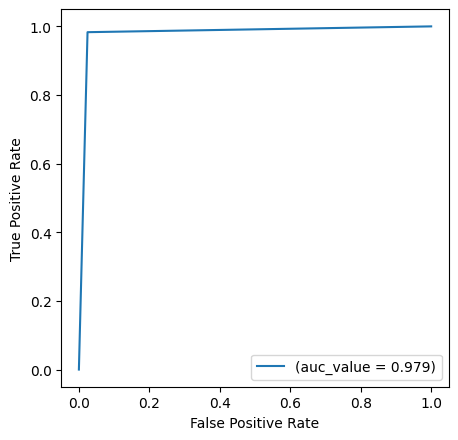


Confusion Matrix: 


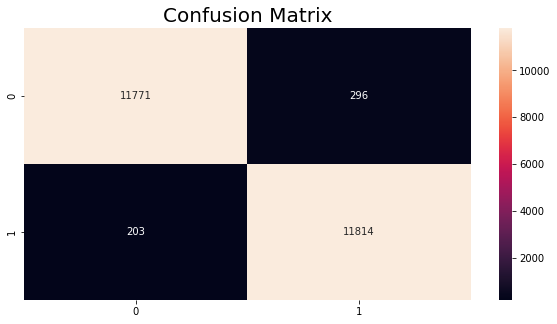

In [49]:
xg = xgb.XGBClassifier()
result(x, y, 0.25, 42, xg)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.91      0.73     12067
           1       0.82      0.42      0.55     12017

    accuracy                           0.66     24084
   macro avg       0.71      0.66      0.64     24084
weighted avg       0.71      0.66      0.64     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6623069257598405
----------------------------------------------------------------------------------------------------

F1 Score:  0.551480725748635
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.551480725748635
----------------------------------------------------------------------------------------------------



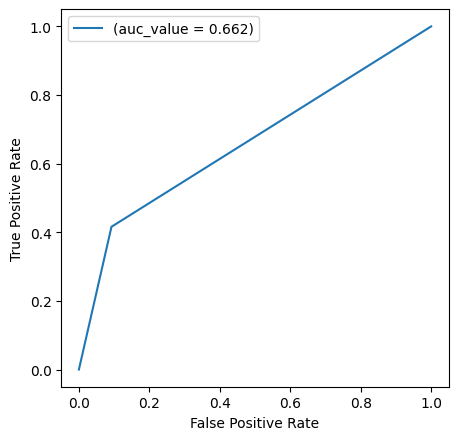


Confusion Matrix: 


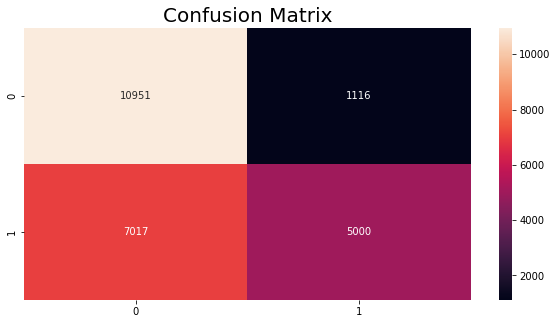

In [50]:
nb = GaussianNB()
result(x, y, 0.25, 42, nb)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12067
           1       0.98      1.00      0.99     12017

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9895366218236173
----------------------------------------------------------------------------------------------------

F1 Score:  0.989623651486453
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.989623651486453
----------------------------------------------------------------------------------------------------



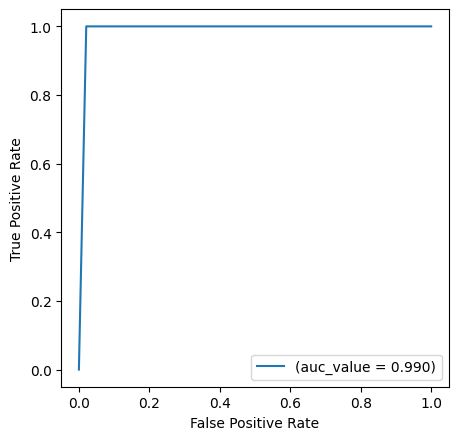


Confusion Matrix: 


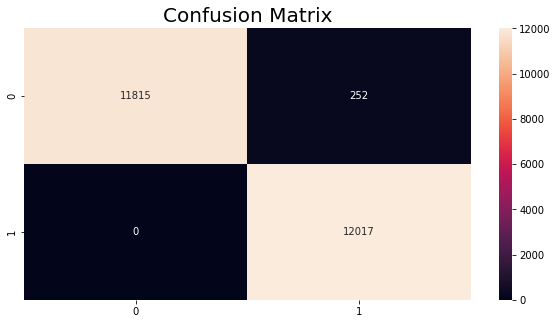

In [51]:
dt = DecisionTreeClassifier()
result(x, y, 0.25, 42, dt)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.93      0.79     12067
           1       0.88      0.58      0.70     12017

    accuracy                           0.75     24084
   macro avg       0.79      0.75      0.74     24084
weighted avg       0.79      0.75      0.74     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.7512871616010629
----------------------------------------------------------------------------------------------------

F1 Score:  0.6982975722776267
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.6982975722776267
----------------------------------------------------------------------------------------------------



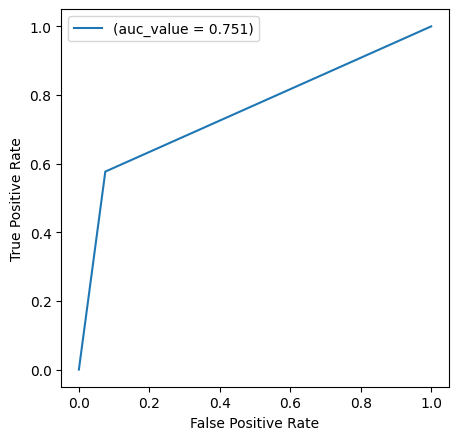


Confusion Matrix: 


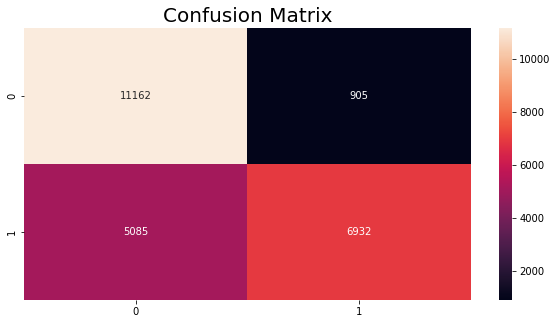

In [52]:
sgd = SGDClassifier()
result(x, y, 0.25, 42, sgd)

In [53]:
classifier_list = ["Logistic Regression", "Random Forest", "KNN", "Gradient Boosting", "XGBoost", "Naive Bayes", "Decision Tree", "Stochastic Gradient Descent"]
list_class = []
for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], accuracy_list[i], f1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

[['Logistic Regression',
  0.798538448762664,
  0.7833541703875692,
  0.7983963824514535],
 ['Random Forest', 0.9907407407407407, 0.9908067774250732, 0.9907599237590121],
 ['KNN', 0.973177213087527, 0.9737312947299935, 0.9732251978959754],
 ['Gradient Boosting',
  0.9134695233349942,
  0.9089956331877729,
  0.9133713979227198],
 ['XGBoost', 0.9792808503570836, 0.9793177767646204, 0.9792887777921363],
 ['Naive Bayes', 0.6623069257598405, 0.551480725748635, 0.6617967954419756],
 ['Decision Tree', 0.9895366218236173, 0.989623651486453, 0.989558299494489],
 ['Stochastic Gradient Descent',
  0.7512871616010629,
  0.6982975722776267,
  0.7509257675131772]]

In [54]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "Accuracy")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
1,Random Forest,0.990741,0.990807,0.990760
6,Decision Tree,0.989537,0.989624,0.989558
4,XGBoost,0.979281,0.979318,0.979289
2,KNN,0.973177,0.973731,0.973225
3,Gradient Boosting,0.913470,0.908996,0.913371
0,Logistic Regression,0.798538,0.783354,0.798396
7,Stochastic Gradient Descent,0.751287,0.698298,0.750926
5,Naive Bayes,0.662307,0.551481,0.661797


<AxesSubplot:xlabel='Accuracy', ylabel='Classifier'>

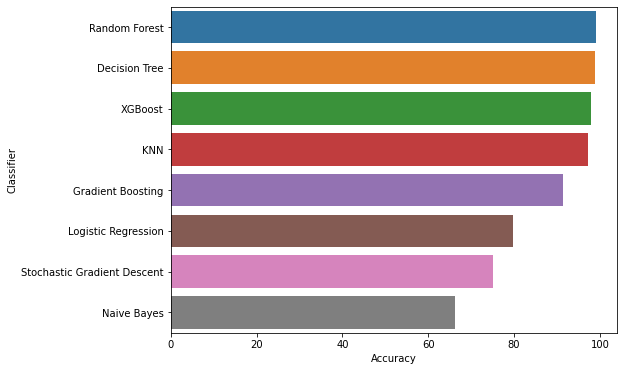

In [55]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["Accuracy"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("Accuracy", ascending = False).Classifier)

<AxesSubplot:xlabel='F1 Score', ylabel='Classifier'>

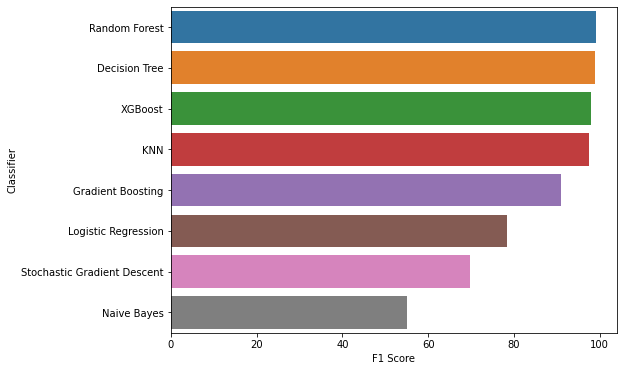

In [56]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["F1 Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("F1 Score", ascending = False).Classifier)

<AxesSubplot:xlabel='ROC-AUC Score', ylabel='Classifier'>

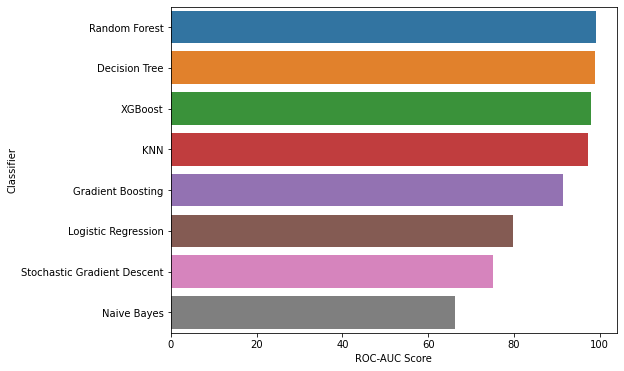

In [57]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["ROC-AUC Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("ROC-AUC Score", ascending = False).Classifier)